# Content-Based Recommendation Engine

This recommendation engine takes in a seed track and outputs track recommendations based on similarity measures

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [3]:
#read data
chart_tracks_df=pd.read_csv("../data/spotify_daily_charts_tracks_predicted_genres.csv")
#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_pop_prob,predicted_rap_prob,predicted_rnb_prob,predicted_rock_prob
0,61lfBHo44YaBIhAx1031CP,dear P,0Vw76uk7P8yVtTClWyOhac,HONNE,3DG5MS8iKYcJROCnb1DYDf,61426,2020-07-03,49,0.304,0.154,...,classical,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2Uj9aeKOXPx4cgHrcd9401,Midnight Sky,30mZI7Hw2MhoarTVYxfyZM,Unique Salonga,2jBckVaJetRQeHQqgoLnh4,247968,2018-07-13,0,0.496,0.155,...,jazz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,24bmXekGRqVFRlPYdfzyJr,Midnight Sky,30mZI7Hw2MhoarTVYxfyZM,Unique Salonga,60qph1sDjhgZtPR4IEnu5Y,244426,2018-08-13,61,0.495,0.149,...,jazz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2HO0uCyq8jOveEzvmo4JEu,Fly,64KEffDW9EtZ1y2vBYgq8T,Marshmello,3HuhZO6x7i7vXqjQfOEh7b,193777,2018-03-09,66,0.630,0.900,...,electronic,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5eFzCfsj3d0yWumdEldZwL,Midnight Sky,30mZI7Hw2MhoarTVYxfyZM,Unique Salonga,0VF88sHKjbSWtm1wFHTSAg,244426,2018-08-13,0,0.495,0.149,...,jazz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
chart_tracks_df.shape

(3284, 30)

## 2. Input Seed Track


In [5]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [6]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=='The Scientist'].iloc[0]
seed_track_data[feature_cols]

danceability        0.557000
energy              0.442000
loudness            0.697073
speechiness         0.024300
acousticness        0.731000
instrumentalness    0.000015
liveness            0.110000
valence             0.213000
tempo               0.576582
Name: 899, dtype: object

## 3. Explore Similarity Measures

In [7]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity


##### Use audio features only

Euclidean

In [8]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1955,FAKE LOVE,BTS,0.000,pop,0.557,0.719,0.807984,0.0372,0.00267,0.000000,0.3060,0.344,0.153392
1206,Toothbrush,DNCE,0.000,rock,0.557,0.791,0.756561,0.1380,0.12000,0.000000,0.3970,0.850,0.322032
2493,The Breakup,LANY,0.000,pop,0.557,0.709,0.773183,0.0788,0.10100,0.047700,0.3030,0.554,0.390911
1545,Daylight,Taylor Swift,0.000,pop,0.557,0.496,0.599713,0.0563,0.80800,0.000173,0.0772,0.265,0.599386
1768,Wherever You Will Go,The Calling,0.001,country,0.558,0.719,0.783501,0.0267,0.03670,0.000000,0.1150,0.371,0.365836
1969,Hanggang Kailan - Umuwi Ka Na Baby,Orange & Lemons,0.001,rock,0.556,0.674,0.765077,0.0296,0.11600,0.000002,0.2260,0.399,0.577542
2436,Someday We'll Know,Mandy Moore,0.001,pop,0.556,0.590,0.763234,0.0313,0.36100,0.000000,0.1200,0.272,0.340307
2294,Sober,G-Eazy,0.001,pop,0.558,0.766,0.749110,0.2310,0.26300,0.000000,0.3200,0.182,0.268949
2292,Sober,G-Eazy,0.001,pop,0.558,0.766,0.749110,0.2310,0.26300,0.000000,0.3200,0.182,0.268949
1239,The Day You Said Goodnight,Hale,0.001,pop,0.558,0.553,0.719795,0.0323,0.49200,0.000000,0.1160,0.251,0.502658


Manhattan

In [9]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1955,FAKE LOVE,BTS,0.000,pop,0.557,0.719,0.807984,0.0372,0.00267,0.000000,0.3060,0.344,0.153392
1206,Toothbrush,DNCE,0.000,rock,0.557,0.791,0.756561,0.1380,0.12000,0.000000,0.3970,0.850,0.322032
1545,Daylight,Taylor Swift,0.000,pop,0.557,0.496,0.599713,0.0563,0.80800,0.000173,0.0772,0.265,0.599386
2493,The Breakup,LANY,0.000,pop,0.557,0.709,0.773183,0.0788,0.10100,0.047700,0.3030,0.554,0.390911
227,Someday,Nina,0.001,jazz,0.556,0.212,0.534411,0.0406,0.94100,0.000000,0.0982,0.514,0.497299
1175,Nobela,Julie Anne San Jose,0.001,jazz,0.558,0.385,0.716070,0.0294,0.76600,0.000000,0.0878,0.122,0.144242
1768,Wherever You Will Go,The Calling,0.001,country,0.558,0.719,0.783501,0.0267,0.03670,0.000000,0.1150,0.371,0.365836
1239,The Day You Said Goodnight,Hale,0.001,pop,0.558,0.553,0.719795,0.0323,0.49200,0.000000,0.1160,0.251,0.502658
3233,Make It With You,Ben&Ben,0.001,pop,0.558,0.458,0.554309,0.0485,0.70000,0.000021,0.1860,0.342,0.211084
1265,"Dying Inside To Hold You - From "" All Of You"" ...",Darren Espanto,0.001,country,0.556,0.625,0.698956,0.0370,0.33600,0.000000,0.1100,0.403,0.322063


Cosine

In [9]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1395,Isang Araw,Kaye Cal,0.002299,rock,0.466,0.342,0.657482,0.0300,0.613,0.000000,0.1240,0.210,0.536100
958,Imahe,Magnus Haven,0.002810,pop,0.604,0.446,0.664893,0.0341,0.630,0.000000,0.0859,0.199,0.589875
1311,Kung Wala Ka,Hale,0.003400,pop,0.500,0.339,0.693920,0.0263,0.710,0.002220,0.1080,0.152,0.541335
1280,Let Me Be the One,Julie Anne San Jose,0.004728,rock,0.587,0.396,0.635742,0.0399,0.643,0.000000,0.1060,0.207,0.460292
202,ocean eyes,Billie Eilish,0.005340,pop,0.511,0.363,0.679632,0.0410,0.816,0.031700,0.0840,0.169,0.595982
534,Tilaluha,SB19,0.005681,pop,0.463,0.456,0.712549,0.0279,0.826,0.000102,0.1440,0.218,0.562697
1920,Daylight,Taylor Swift,0.005828,jazz,0.557,0.496,0.599713,0.0563,0.808,0.000173,0.0772,0.265,0.628848
1534,I'll Never Go,Erik Santos,0.006096,jazz,0.444,0.327,0.531627,0.0334,0.684,0.000000,0.0839,0.240,0.561812
1396,Pusong Ligaw,Jericho Rosales,0.006777,rock,0.608,0.417,0.569458,0.0276,0.645,0.000007,0.1280,0.142,0.486779
1198,Hanggang Kailan (Umuwi Ka Na Baby),Angelina Cruz,0.006907,pop,0.590,0.407,0.621126,0.0361,0.861,0.000010,0.0940,0.276,0.602179


View histograms of the 3 similarity measures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4162ed62e0>,
      dtype=object)

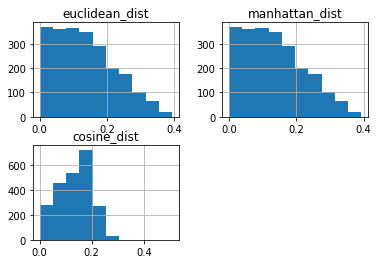

In [10]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [11]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

<ipython-input-11-3525b1bc5e04>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
958,Imahe,Magnus Haven,0.002810,pop,0.604,0.446,0.664893,0.0341,0.630,0.000000,0.0859,0.199,0.589875
1311,Kung Wala Ka,Hale,0.003400,pop,0.500,0.339,0.693920,0.0263,0.710,0.002220,0.1080,0.152,0.541335
202,ocean eyes,Billie Eilish,0.005340,pop,0.511,0.363,0.679632,0.0410,0.816,0.031700,0.0840,0.169,0.595982
534,Tilaluha,SB19,0.005681,pop,0.463,0.456,0.712549,0.0279,0.826,0.000102,0.1440,0.218,0.562697
1198,Hanggang Kailan (Umuwi Ka Na Baby),Angelina Cruz,0.006907,pop,0.590,0.407,0.621126,0.0361,0.861,0.000010,0.0940,0.276,0.602179
212,ocean eyes,Billie Eilish,0.007309,pop,0.475,0.370,0.676561,0.0361,0.819,0.057700,0.0841,0.157,0.595569
70,Use This Gospel,Kanye West,0.008323,pop,0.611,0.459,0.832098,0.0422,0.614,0.000000,0.1260,0.177,0.617854
919,Malayo,Ace Banzuelo,0.009309,pop,0.421,0.485,0.687984,0.0333,0.797,0.000020,0.1170,0.164,0.513867
1721,Your Love - Dolce Amore Teleserye Theme,Juris,0.010509,pop,0.520,0.309,0.499939,0.0534,0.597,0.000000,0.1020,0.177,0.629590
857,Here I Am Again,Yerin Baek,0.010642,pop,0.451,0.465,0.808884,0.0286,0.831,0.000000,0.1070,0.204,0.510458


###### Audio features and genre probabilities

In [12]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
chart_tracks_df['cosine_dist_mod'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_mod','predicted_genre']+cols]

,track_name,artist_name,cosine_dist_mod,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,valence,tempo,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_pop_prob,predicted_rap_prob,predicted_rnb_prob,predicted_rock_prob
534,Tilaluha,SB19,0.004545,pop,0.463,0.456,0.712549,0.0279,0.826,0.000102,...,0.218,0.562697,0.0,0.000000,0.0,0.166667,0.666667,0.0,0.000000,0.166667
1311,Kung Wala Ka,Hale,0.013736,pop,0.500,0.339,0.693920,0.0263,0.710,0.002220,...,0.152,0.541335,0.0,0.000000,0.0,0.333333,0.500000,0.0,0.000000,0.166667
202,ocean eyes,Billie Eilish,0.014338,pop,0.511,0.363,0.679632,0.0410,0.816,0.031700,...,0.169,0.595982,0.0,0.000000,0.0,0.000000,0.833333,0.0,0.000000,0.166667
212,ocean eyes,Billie Eilish,0.016180,pop,0.475,0.370,0.676561,0.0361,0.819,0.057700,...,0.157,0.595569,0.0,0.000000,0.0,0.000000,0.833333,0.0,0.000000,0.166667
919,Malayo,Ace Banzuelo,0.018640,pop,0.421,0.485,0.687984,0.0333,0.797,0.000020,...,0.164,0.513867,0.0,0.000000,0.0,0.166667,0.500000,0.0,0.000000,0.333333
607,Rock with You,Paolo Sandejas,0.019974,pop,0.567,0.334,0.672549,0.0322,0.653,0.000000,...,0.178,0.757411,0.0,0.000000,0.0,0.000000,0.666667,0.0,0.166667,0.166667
241,To Die For,Sam Smith,0.021667,pop,0.483,0.361,0.669846,0.0738,0.832,0.000005,...,0.307,0.768715,0.0,0.166667,0.0,0.166667,0.666667,0.0,0.000000,0.000000
1409,Bubbly,Colbie Caillat,0.021953,pop,0.688,0.477,0.719181,0.0360,0.594,0.000000,...,0.257,0.486069,0.0,0.000000,0.0,0.166667,0.500000,0.0,0.166667,0.166667
478,Let Me Down Slowly,Alec Benjamin,0.023414,pop,0.652,0.557,0.758895,0.0318,0.740,0.000000,...,0.483,0.629429,0.0,0.166667,0.0,0.000000,0.666667,0.0,0.000000,0.166667
1488,Mundo,Khel Pangilinan,0.024648,pop,0.602,0.418,0.557339,0.0271,0.526,0.000019,...,0.138,0.486747,0.0,0.000000,0.0,0.333333,0.500000,0.0,0.000000,0.166667
